170498071/170498071 [==============================] - 4s 0us/step


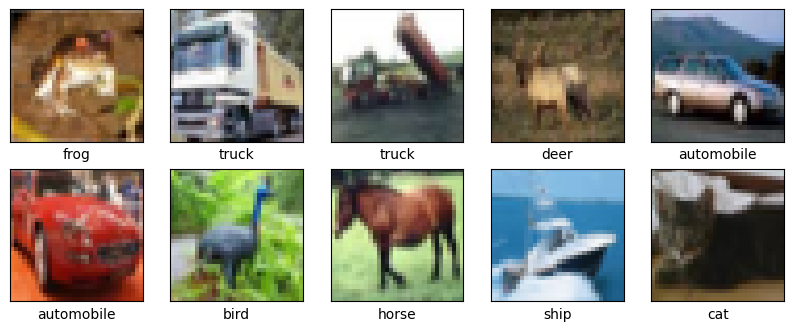

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Mengunduh dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Menggunakan subset dari dataset untuk mempercepat training
train_images = train_images[:10]
train_labels = train_labels[:10]
test_images = test_images[:2]
test_labels = test_labels[:2]

# Normalisasi gambar ke rentang [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Menampilkan contoh gambar
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Menampilkan arsitektur model
model.summary()

# Menambahkan layer fully connected
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Menampilkan arsitektur lengkap
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [3]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 2.3204 - accuracy: 0.1000 - val_loss: 2.4390 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 43ms/step - loss: 2.2222 - accuracy: 0.3000 - val_loss: 2.5401 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 44ms/step - loss: 2.1329 - accuracy: 0.2000 - val_loss: 2.6982 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 42ms/step - loss: 2.0475 - accuracy: 0.2000 - val_loss: 2.9555 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 41ms/step - loss: 1.9585 - accuracy: 0.2000 - val_loss: 3.2528 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 46ms/step - loss: 1.8736 - accuracy: 0.2000 - val_loss: 3.4267 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 53ms/step - loss: 1.7763 - accuracy: 0.3000 - val_loss: 3.4498 - val_accuracy: 0.0000e+00
E

1/1 [==============================] - 0s 123ms/step


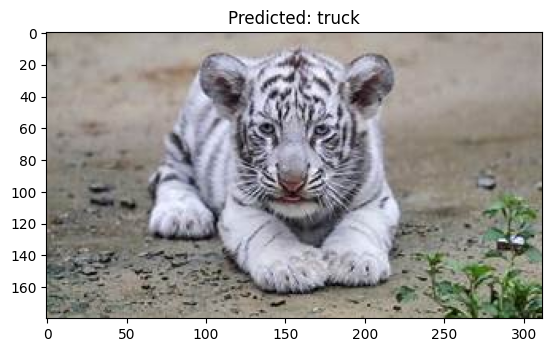

Predicted class: truck


In [4]:
def test_new_image(image_path):
    # Membaca gambar
    img = plt.imread(image_path)
    # Mengubah ukuran gambar menjadi 32x32 dan normalisasi
    img_resized = tf.image.resize(img, (32, 32)) / 255.0
    # Menambahkan dimensi batch
    img_batch = np.expand_dims(img_resized, axis=0)

    # Membuat prediksi
    predictions = model.predict(img_batch)
    predicted_label = np.argmax(predictions)

    # Menampilkan gambar dan prediksi
    plt.imshow(img)
    plt.title(f'Predicted: {class_names[predicted_label]}')
    plt.show()

    print(f'Predicted class: {class_names[predicted_label]}')

# Contoh penggunaan
# Upload gambar di Google Colab terlebih dahulu, lalu gunakan path gambar
test_new_image('harimau.jpg')

Saving harimau.jpg to harimau (1).jpg
1/1 [==============================] - 0s 21ms/step


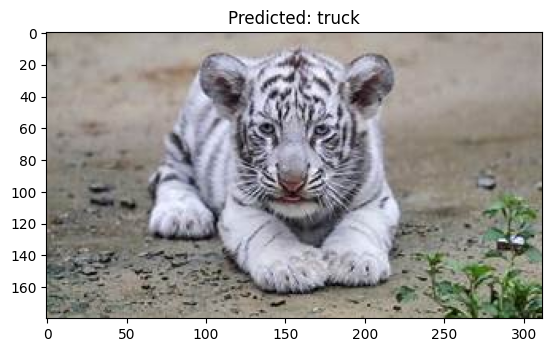

Predicted class: truck


In [5]:
from google.colab import files
uploaded = files.upload()

# Menggunakan path dari gambar yang di-upload
for filename in uploaded.keys():
    test_new_image(filename)